In [1]:
import pandas as pd

In [2]:
rq2 = pd.read_csv('rq2_dataset.csv')
print(rq2.info())
rq2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35929 entries, 0 to 35928
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   popular                 35929 non-null  int64  
 2   Translated_Review       35929 non-null  object 
 3   Sentiment               35929 non-null  object 
 4   Sentiment_Polarity      35929 non-null  float64
 5   Sentiment_Subjectivity  35929 non-null  float64
 6   sentiment_text          35929 non-null  object 
 7   subjectivity_text       35929 non-null  object 
 8   processed_reviews       35866 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.5+ MB
None


App  popular  \
0  10 Best Foods for You        0   
1  10 Best Foods for You        0   
2  10 Best Foods for You        0   
3  10 Best Foods for You        0   
4  10 Best Foods for You        0   

                                   Translated_Review Sentiment  \
0  I like eat delicious food. That's I'm cooking ...  Positive   
1    This help eating healthy exercise regular basis  Positive   
2         Works great especially going grocery store  Positive   
3                                       Best idea us  Positive   
4                                           Best way  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
0                1.00                0.533333       Positive   
1                0.25                0.288462        Neutral   
2                0.40                0.875000       Positive   
3                1.00                0.300000       Positive   
4                1.00                0.300000       Positive   

  subjectivity_text                                  processed_reviews  
0        Subjective  like eat delicious food thats im cooking food ...  
1         Objective         help eating healthy exercise regular basis  
2        Subjective          work great especially going grocery store  
3         Objective                                        best idea u  
4         Objective                                           best way

## Topic Modelling For Popular App

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Text analytics packages
import gensim
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Object serialization package
# Tutorial: https://pythonprogramming.net/python-pickle-module-save-objects-serialization/
import pickle

from gensim.models import CoherenceModel
import pyLDAvis

C:\Users\Darren\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
#create stop words list
stop_words = nltk.corpus.stopwords.words('english')

#create tokenizer
#\w matches [a-zA-Z0-9_]. This tokenizer splits the string using regular expressions. E.g - '[A-Z]\w+' will select just the capital words
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')

#create lemmatizer
wnl = nltk.stem.wordnet.WordNetLemmatizer()

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def process_text(documents):
    process_docs = []
    doc_tokens = []
    for doc in documents:
        doc = doc.lower()
        doc_tokens = wtk.tokenize(doc)
        doc_tokens = [token for token in doc_tokens if token not in stop_words]
        doc_tokens = [wnl.lemmatize(token) for token in doc_tokens] #Can try spacy or see how to use the (nltk.pos_tag()) with lemmatizer
        doc_tokens = [token for token in doc_tokens if len(token) > 1]
        process_docs.append(doc_tokens)
    return process_docs

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
process_text('hello there you person'.split())

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['hello'], [], [], ['person']]

In [8]:
rq2 = rq2.dropna()
rq2['processed_further'] = rq2['processed_reviews'].map(lambda x: x.split())
rq2.head()

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


App  popular  \
0  10 Best Foods for You        0   
1  10 Best Foods for You        0   
2  10 Best Foods for You        0   
3  10 Best Foods for You        0   
4  10 Best Foods for You        0   

                                   Translated_Review Sentiment  \
0  I like eat delicious food. That's I'm cooking ...  Positive   
1    This help eating healthy exercise regular basis  Positive   
2         Works great especially going grocery store  Positive   
3                                       Best idea us  Positive   
4                                           Best way  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
0                1.00                0.533333       Positive   
1                0.25                0.288462        Neutral   
2                0.40                0.875000       Positive   
3                1.00                0.300000       Positive   
4                1.00                0.300000       Positive   

  subjectivity_text                                  processed_reviews  \
0        Subjective  like eat delicious food thats im cooking food ...   
1         Objective         help eating healthy exercise regular basis   
2        Subjective          work great especially going grocery store   
3         Objective                                        best idea u   
4         Objective                                           best way   

                                   processed_further  
0  [like, eat, delicious, food, thats, im, cookin...  
1  [help, eating, healthy, exercise, regular, basis]  
2   [work, great, especially, going, grocery, store]  
3                                    [best, idea, u]  
4                                        [best, way]

In [9]:
popular = rq2[rq2['popular'] == 1].copy()
print(popular.shape)
non_popular = rq2[rq2['popular'] == 0].copy()
print(non_popular.shape)

(20165, 10)
(15701, 10)


C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Popular
# Create dictionary
popular_dictionary = gensim.corpora.Dictionary(popular['processed_further']) #map each word to a integer ID

# print('Sample word to id mappings:\n', list(popular_dictionary.items())[:50])
# print('Total Vocabulary Size:', len(popular_dictionary))

popular_dictionary.filter_extremes(no_below=20, no_above=0.5)
# print('Total Vocabulary Size:', len(popular_dictionary))

# Bag of words
popular_corpus_vect = [popular_dictionary.doc2bow(text) for text in popular['processed_further']]
# print(popular_corpus_vect[:10])

# Topic modelling
popular_topic_modelling = []
popular_perp = []
popular_coh = []

for i in range(3, 16):
    print('No. of topics:', i)
    ldamodel = gensim.models.ldamodel.LdaModel(popular_corpus_vect, num_topics = i, id2word=popular_dictionary, passes=25, random_state= 0)
    popular_topic_modelling.append(ldamodel)
    
    # Show results
    for num, topic in ldamodel.show_topics(formatted=True, num_topics=i, num_words=10):
        print(str(num)+": "+ topic)
        
    #  Perplexity
    log_perplexity = ldamodel.log_perplexity(popular_corpus_vect)
    perplexity = 2**(-log_perplexity)
    popular_perp.append(perplexity)
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=popular['processed_further'], dictionary=popular_dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    popular_coh.append(coherence_lda)
    
    print()
    
# print(popular_topic_modelling)
# print(popular_perp)
# print(popular_coh)

No. of topics: 3
0: 0.015*"phone" + 0.014*"update" + 0.013*"time" + 0.012*"work" + 0.011*"hotel" + 0.011*"cant" + 0.011*"app" + 0.011*"show" + 0.010*"please" + 0.009*"google"
1: 0.028*"good" + 0.023*"like" + 0.021*"great" + 0.020*"love" + 0.015*"app" + 0.014*"really" + 0.012*"best" + 0.012*"easy" + 0.011*"nice" + 0.011*"would"
2: 0.073*"game" + 0.027*"ad" + 0.022*"get" + 0.019*"play" + 0.016*"time" + 0.015*"level" + 0.012*"fun" + 0.012*"like" + 0.012*"u" + 0.011*"money"

No. of topics: 4
0: 0.024*"ad" + 0.019*"hotel" + 0.018*"show" + 0.015*"get" + 0.014*"video" + 0.014*"pay" + 0.013*"price" + 0.011*"free" + 0.011*"even" + 0.010*"room"
1: 0.032*"good" + 0.029*"like" + 0.023*"great" + 0.021*"love" + 0.019*"app" + 0.016*"would" + 0.014*"really" + 0.014*"easy" + 0.012*"best" + 0.012*"nice"
2: 0.018*"phone" + 0.018*"time" + 0.018*"update" + 0.012*"work" + 0.012*"google" + 0.012*"cant" + 0.012*"app" + 0.011*"please" + 0.011*"problem" + 0.009*"fix"
3: 0.087*"game" + 0.022*"get" + 0.021*"play"


No. of topics: 11
0: 0.107*"ad" + 0.030*"many" + 0.025*"get" + 0.022*"pay" + 0.022*"watch" + 0.022*"card" + 0.019*"answer" + 0.019*"time" + 0.015*"every" + 0.015*"play"
1: 0.030*"u" + 0.025*"photo" + 0.021*"picture" + 0.019*"love" + 0.016*"even" + 0.014*"cant" + 0.012*"please" + 0.012*"make" + 0.012*"would" + 0.011*"think"
2: 0.146*"game" + 0.029*"good" + 0.025*"star" + 0.024*"money" + 0.020*"really" + 0.019*"fun" + 0.017*"much" + 0.017*"play" + 0.016*"awesome" + 0.016*"ever"
3: 0.083*"game" + 0.036*"level" + 0.034*"time" + 0.030*"love" + 0.028*"get" + 0.026*"play" + 0.023*"playing" + 0.015*"fun" + 0.011*"every" + 0.011*"im"
4: 0.050*"hotel" + 0.025*"price" + 0.023*"book" + 0.022*"booking" + 0.022*"find" + 0.022*"room" + 0.021*"night" + 0.020*"customer" + 0.016*"show" + 0.014*"time"
5: 0.019*"using" + 0.018*"note" + 0.018*"work" + 0.018*"mobile" + 0.016*"search" + 0.016*"version" + 0.013*"website" + 0.013*"year" + 0.013*"phone" + 0.013*"show"
6: 0.059*"good" + 0.044*"great" + 0.037*"a

In [55]:
for num, topic in popular_topic_modelling[7].show_topics(formatted=True, num_topics=8, num_words=10):
        print(str(num)+": "+ topic)

2: 0.046*"please" + 0.039*"fix" + 0.031*"update" + 0.024*"issue" + 0.023*"problem" + 0.022*"star" + 0.014*"back" + 0.012*"fixed" + 0.012*"get" + 0.012*"bug"
4: 0.050*"hotel" + 0.025*"find" + 0.023*"book" + 0.022*"booking" + 0.021*"room" + 0.020*"show" + 0.020*"price" + 0.015*"news" + 0.015*"app" + 0.012*"search"
0: 0.048*"pay" + 0.038*"free" + 0.035*"money" + 0.029*"customer" + 0.028*"card" + 0.022*"get" + 0.019*"dont" + 0.018*"paid" + 0.016*"version" + 0.013*"buy"
8: 0.030*"time" + 0.015*"say" + 0.014*"know" + 0.014*"u" + 0.013*"reservation" + 0.012*"bad" + 0.011*"data" + 0.011*"even" + 0.011*"movie" + 0.011*"good"
9: 0.047*"like" + 0.030*"would" + 0.020*"make" + 0.018*"thing" + 0.018*"u" + 0.016*"best" + 0.015*"people" + 0.013*"also" + 0.012*"could" + 0.012*"think"
7: 0.112*"ad" + 0.034*"video" + 0.031*"many" + 0.025*"time" + 0.023*"watch" + 0.023*"get" + 0.021*"game" + 0.021*"play" + 0.020*"nice" + 0.018*"add"
5: 0.037*"work" + 0.030*"update" + 0.027*"phone" + 0.022*"open" + 0.020*"

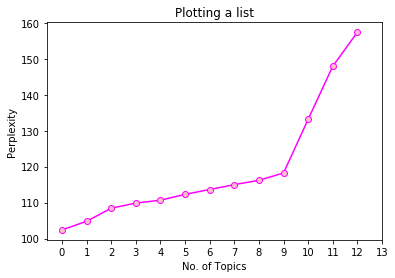

In [52]:
plt.plot(popular_perp, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(popular_perp)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Perplexity') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

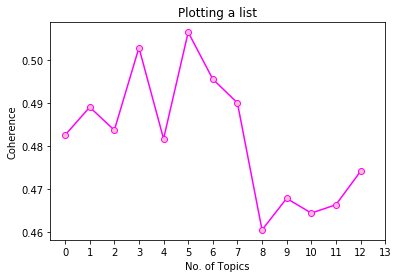

In [54]:
plt.plot(popular_coh, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(popular_coh)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Coherence') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

In [29]:
# Create dictionary
dictionary = gensim.corpora.Dictionary(rq2['processed_further']) #map each word to a integer ID

print('Sample word to id mappings:\n', list(dictionary.items())[:50])
print('Total Vocabulary Size:', len(dictionary))

Sample word to id mappings:
 [(0, 'also'), (1, 'best'), (2, 'case'), (3, 'cooking'), (4, 'delicious'), (5, 'eat'), (6, 'food'), (7, 'help'), (8, 'im'), (9, 'life'), (10, 'like'), (11, 'lot'), (12, 'shelf'), (13, 'thats'), (14, 'basis'), (15, 'eating'), (16, 'exercise'), (17, 'healthy'), (18, 'regular'), (19, 'especially'), (20, 'going'), (21, 'great'), (22, 'grocery'), (23, 'store'), (24, 'work'), (25, 'idea'), (26, 'u'), (27, 'way'), (28, 'amazing'), (29, 'forward'), (30, 'looking'), (31, 'get'), (32, 'helpful'), (33, 'site'), (34, 'good'), (35, 'amount'), (36, 'error'), (37, 'fixed'), (38, 'given'), (39, 'information'), (40, 'question'), (41, 'shared'), (42, 'spelling'), (43, 'star'), (44, 'useful'), (45, 'validity'), (46, 'add'), (47, 'arthritis'), (48, 'detox'), (49, 'eye')]
Total Vocabulary Size: 20037


In [30]:
dictionary.filter_extremes(no_below=20, no_above=0.5)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 2584


In [31]:
# Bag of words
corpus_vect = [dictionary.doc2bow(text) for text in rq2['processed_further']]
print(corpus_vect[:10])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(6, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(1, 1), (23, 1), (24, 1)], [(1, 1), (25, 1)], [(26, 1)], [(27, 1), (28, 1)], [(5, 1), (6, 1), (29, 1), (30, 1), (31, 1)], [(32, 1)], [(33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1)]]


In [32]:
# Topic modelling
import random

random.seed(1) #allows to fix the randomness of the number
print(random.randint(0,9))

num_topics = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus_vect, num_topics = num_topics, id2word=dictionary, passes=25, random_state= 0)
print(ldamodel.print_topics(num_topics = num_topics, num_words = 10))

2
[(0, '0.026*"time" + 0.026*"update" + 0.018*"work" + 0.017*"phone" + 0.015*"fix" + 0.015*"get" + 0.012*"even" + 0.011*"cant" + 0.011*"back" + 0.011*"problem"'), (1, '0.045*"love" + 0.030*"easy" + 0.029*"best" + 0.026*"great" + 0.014*"use" + 0.013*"much" + 0.012*"thanks" + 0.011*"simple" + 0.011*"help" + 0.010*"useful"'), (2, '0.013*"would" + 0.013*"google" + 0.011*"like" + 0.010*"card" + 0.010*"nice" + 0.010*"see" + 0.010*"photo" + 0.009*"cant" + 0.008*"option" + 0.008*"want"'), (3, '0.086*"game" + 0.034*"ad" + 0.022*"get" + 0.020*"play" + 0.018*"level" + 0.017*"like" + 0.016*"fun" + 0.014*"money" + 0.013*"time" + 0.012*"many"'), (4, '0.068*"good" + 0.036*"great" + 0.030*"like" + 0.017*"really" + 0.012*"would" + 0.012*"watch" + 0.011*"video" + 0.009*"news" + 0.009*"free" + 0.008*"show"')]


In [33]:
for num ,topic in ldamodel.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(num)+": "+ topic)

0: 0.026*"time" + 0.026*"update" + 0.018*"work" + 0.017*"phone" + 0.015*"fix" + 0.015*"get" + 0.012*"even" + 0.011*"cant" + 0.011*"back" + 0.011*"problem"
1: 0.045*"love" + 0.030*"easy" + 0.029*"best" + 0.026*"great" + 0.014*"use" + 0.013*"much" + 0.012*"thanks" + 0.011*"simple" + 0.011*"help" + 0.010*"useful"
2: 0.013*"would" + 0.013*"google" + 0.011*"like" + 0.010*"card" + 0.010*"nice" + 0.010*"see" + 0.010*"photo" + 0.009*"cant" + 0.008*"option" + 0.008*"want"
3: 0.086*"game" + 0.034*"ad" + 0.022*"get" + 0.020*"play" + 0.018*"level" + 0.017*"like" + 0.016*"fun" + 0.014*"money" + 0.013*"time" + 0.012*"many"
4: 0.068*"good" + 0.036*"great" + 0.030*"like" + 0.017*"really" + 0.012*"would" + 0.012*"watch" + 0.011*"video" + 0.009*"news" + 0.009*"free" + 0.008*"show"


In [35]:
import pyLDAvis

In [38]:
# import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus_vect, dictionary , sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.222003 -0.162823       1        1  24.023151
1     -0.255329 -0.206680       2        1  13.744490
2      0.153140  0.091454       3        1  23.537041
3      0.044603  0.072177       4        1  23.157688
4     -0.164417  0.205872       5        1  15.537627, topic_info=       Term         Freq        Total Category  logprob  loglift
437    game  9699.000000  9699.000000  Default  30.0000  30.0000
32     good  5120.000000  5120.000000  Default  29.0000  29.0000
51     love  4373.000000  4373.000000  Default  28.0000  28.0000
93       ad  3883.000000  3883.000000  Default  27.0000  27.0000
19    great  4779.000000  4779.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
117    time   569.479187  5413.666992   Topic5  -4.8875  -0.3901
203     see   453.110870  1702.757812   Topic5  -5.1161   0.5380
68     need   463.057312  2487.393066   Topic5  -5.0944   0.1808
22     work   448.818481  3402.551270   Topic5  -5.1256  -0.1638
777  people   411.153290  1475.330322   Topic5  -5.2132   0.5842

[317 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
321       1  0.167446    able
321       2  0.008721    able
321       3  0.666296    able
321       4  0.156981    able
386       3  0.998150  access
...     ...       ...     ...
243       5  0.260735   would
586       1  0.566862    year
586       2  0.374913    year
586       3  0.003267    year
586       4  0.054726    year

[460 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [41]:
from gensim.models import CoherenceModel
import pyLDAvis
log_perplexity = ldamodel.log_perplexity(corpus_vect)
perplexity = 2**(-log_perplexity)
print('Perplexity: ',perplexity)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=rq2['processed_further'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity:  122.28873124571646

Coherence Score:  0.5390957000532414


# Topic Modelling for Popular App + Positive Reviews

In [10]:
popular.head()

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


App  popular                                  Translated_Review  \
194  11st        1                           Horrible ID verification   
195  11st        1  Easy even basic Korean. Searching English usua...   
196  11st        1                                               Cool   
197  11st        1  I do not collect it for a month, but I will no...   
198  11st        1  Top bar missing newest update. Hard shop can't...   

    Sentiment  Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
194  Negative           -1.000000                1.000000       Negative   
195  Positive            0.236667                0.301667        Neutral   
196  Positive            0.350000                0.650000       Positive   
197   Neutral            0.000000                1.000000        Neutral   
198  Positive            0.002778                0.363889        Neutral   

    subjectivity_text                                  processed_reviews  \
194        Subjective                           horrible id verification   
195         Objective  easy even basic korean searching english usual...   
196        Subjective                                               cool   
197        Subjective         collect month refund said would call month   
198         Objective  top bar missing newest update hard shop cant s...   

                                     processed_further  
194                       [horrible, id, verification]  
195  [easy, even, basic, korean, searching, english...  
196                                             [cool]  
197  [collect, month, refund, said, would, call, mo...  
198  [top, bar, missing, newest, update, hard, shop...

In [11]:
popular['sentiment_text'].value_counts()

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Neutral     11660
Positive     6788
Negative     1717
Name: sentiment_text, dtype: int64

In [13]:
popular_positive = popular[popular['sentiment_text'] == 'Positive'].copy()
popular_positive.shape

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(6788, 10)

In [14]:
# Popular
# Create dictionary
popular_dictionary = gensim.corpora.Dictionary(popular_positive['processed_further']) #map each word to a integer ID

# print('Sample word to id mappings:\n', list(popular_dictionary.items())[:50])
# print('Total Vocabulary Size:', len(popular_dictionary))

popular_dictionary.filter_extremes(no_below=20, no_above=0.5)
# print('Total Vocabulary Size:', len(popular_dictionary))

# Bag of words
popular_corpus_vect = [popular_dictionary.doc2bow(text) for text in popular_positive['processed_further']]
# print(popular_corpus_vect[:10])

# Topic modelling
popular_topic_modelling = []
popular_perp = []
popular_coh = []

for i in range(3, 16):
    print('No. of topics:', i)
    ldamodel = gensim.models.ldamodel.LdaModel(popular_corpus_vect, num_topics = i, id2word=popular_dictionary, passes=25, random_state= 0)
    popular_topic_modelling.append(ldamodel)
    
    # Show results
    for num, topic in ldamodel.show_topics(formatted=True, num_topics=i, num_words=10):
        print(str(num)+": "+ topic)
        
    #  Perplexity
    log_perplexity = ldamodel.log_perplexity(popular_corpus_vect)
    perplexity = 2**(-log_perplexity)
    popular_perp.append(perplexity)
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=popular_positive['processed_further'], dictionary=popular_dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    popular_coh.append(coherence_lda)
    
    print()

# print(popular_topic_modelling)
# print(popular_perp)
# print(popular_coh)

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. of topics: 3
0: 0.047*"good" + 0.020*"work" + 0.017*"phone" + 0.016*"update" + 0.013*"great" + 0.012*"please" + 0.011*"problem" + 0.010*"photo" + 0.010*"app" + 0.010*"google"
1: 0.047*"love" + 0.038*"great" + 0.036*"app" + 0.028*"easy" + 0.026*"nice" + 0.018*"like" + 0.015*"would" + 0.014*"really" + 0.013*"price" + 0.012*"get"
2: 0.040*"best" + 0.039*"game" + 0.024*"ad" + 0.021*"time" + 0.021*"like" + 0.020*"good" + 0.018*"play" + 0.018*"awesome" + 0.017*"great" + 0.016*"many"

No. of topics: 4
0: 0.024*"great" + 0.021*"update" + 0.018*"work" + 0.016*"phone" + 0.015*"time" + 0.011*"problem" + 0.011*"please" + 0.011*"issue" + 0.011*"fix" + 0.011*"im"
1: 0.062*"love" + 0.047*"app" + 0.042*"great" + 0.023*"easy" + 0.022*"like" + 0.016*"would" + 0.012*"im" + 0.012*"amazing" + 0.011*"get" + 0.011*"really"
2: 0.049*"game" + 0.043*"best" + 0.028*"time" + 0.022*"play" + 0.019*"fun" + 0.018*"awesome" + 0.016*"great" + 0.016*"get" + 0.014*"good" + 0.013*"love"
3: 0.089*"good" + 0.039*"nice" 


No. of topics: 11
0: 0.069*"easy" + 0.035*"use" + 0.031*"app" + 0.026*"cool" + 0.026*"year" + 0.024*"using" + 0.020*"great" + 0.020*"note" + 0.018*"found" + 0.017*"ive"
1: 0.036*"price" + 0.031*"great" + 0.031*"app" + 0.029*"love" + 0.029*"would" + 0.023*"deal" + 0.022*"like" + 0.018*"easy" + 0.017*"get" + 0.017*"option"
2: 0.029*"great" + 0.028*"work" + 0.026*"phone" + 0.021*"time" + 0.020*"picture" + 0.019*"issue" + 0.018*"htc" + 0.016*"also" + 0.016*"camera" + 0.015*"even"
3: 0.037*"useful" + 0.025*"really" + 0.022*"much" + 0.022*"better" + 0.021*"perfect" + 0.020*"love" + 0.020*"thing" + 0.019*"language" + 0.017*"would" + 0.016*"well"
4: 0.269*"good" + 0.023*"far" + 0.022*"really" + 0.021*"friend" + 0.021*"work" + 0.019*"love" + 0.019*"app" + 0.018*"thing" + 0.018*"photo" + 0.015*"like"
5: 0.083*"game" + 0.053*"ad" + 0.035*"play" + 0.033*"many" + 0.032*"fun" + 0.031*"awesome" + 0.029*"like" + 0.028*"get" + 0.027*"time" + 0.021*"love"
6: 0.079*"love" + 0.041*"please" + 0.041*"cant"

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


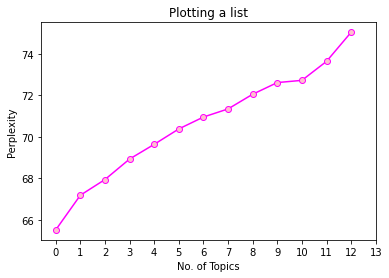

In [15]:
plt.plot(popular_perp, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(popular_perp)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Perplexity') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


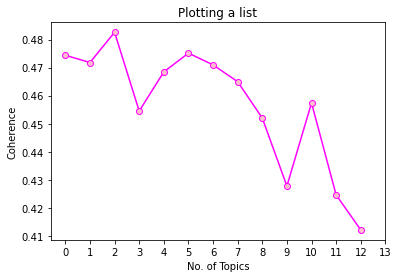

In [16]:
plt.plot(popular_coh, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(popular_coh)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Coherence') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

# Topic Modelling for Popular App + Negative Reviews

In [17]:
popular_negative = popular[popular['sentiment_text'] == 'Negative'].copy()
popular_negative.shape

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1717, 10)

In [18]:
# Popular
# Create dictionary
popular_dictionary = gensim.corpora.Dictionary(popular_negative['processed_further']) #map each word to a integer ID

# print('Sample word to id mappings:\n', list(popular_dictionary.items())[:50])
# print('Total Vocabulary Size:', len(popular_dictionary))

popular_dictionary.filter_extremes(no_below=20, no_above=0.5)
# print('Total Vocabulary Size:', len(popular_dictionary))

# Bag of words
popular_corpus_vect = [popular_dictionary.doc2bow(text) for text in popular_negative['processed_further']]
# print(popular_corpus_vect[:10])

# Topic modelling
popular_topic_modelling = []
popular_perp = []
popular_coh = []

for i in range(3, 16):
    print('No. of topics:', i)
    ldamodel = gensim.models.ldamodel.LdaModel(popular_corpus_vect, num_topics = i, id2word=popular_dictionary, passes=25, random_state= 0)
    popular_topic_modelling.append(ldamodel)
    
    # Show results
    for num, topic in ldamodel.show_topics(formatted=True, num_topics=i, num_words=10):
        print(str(num)+": "+ topic)
        
    #  Perplexity
    log_perplexity = ldamodel.log_perplexity(popular_corpus_vect)
    perplexity = 2**(-log_perplexity)
    popular_perp.append(perplexity)
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=popular_negative['processed_further'], dictionary=popular_dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    popular_coh.append(coherence_lda)
    
    print()

# print(popular_topic_modelling)
# print(popular_perp)
# print(popular_coh)

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. of topics: 3
0: 0.136*"game" + 0.063*"ad" + 0.034*"worst" + 0.032*"hate" + 0.029*"play" + 0.024*"make" + 0.020*"video" + 0.019*"please" + 0.019*"like" + 0.019*"star"
1: 0.033*"app" + 0.032*"bad" + 0.026*"work" + 0.025*"update" + 0.022*"phone" + 0.021*"want" + 0.020*"google" + 0.018*"useless" + 0.018*"pay" + 0.018*"time"
2: 0.059*"game" + 0.046*"get" + 0.032*"time" + 0.030*"level" + 0.027*"im" + 0.022*"cant" + 0.020*"even" + 0.017*"slow" + 0.015*"money" + 0.015*"ive"

No. of topics: 4
0: 0.163*"game" + 0.040*"worst" + 0.039*"ad" + 0.028*"play" + 0.027*"make" + 0.021*"never" + 0.020*"ever" + 0.018*"like" + 0.017*"video" + 0.016*"please"
1: 0.037*"bad" + 0.031*"work" + 0.027*"google" + 0.025*"app" + 0.025*"useless" + 0.025*"want" + 0.024*"update" + 0.020*"phone" + 0.018*"account" + 0.018*"stupid"
2: 0.064*"game" + 0.049*"get" + 0.033*"cant" + 0.031*"level" + 0.024*"time" + 0.020*"im" + 0.020*"like" + 0.019*"even" + 0.017*"people" + 0.017*"horrible"
3: 0.049*"ad" + 0.037*"hate" + 0.033


No. of topics: 11
0: 0.299*"game" + 0.044*"play" + 0.035*"like" + 0.025*"ad" + 0.019*"see" + 0.018*"fix" + 0.017*"freeze" + 0.017*"make" + 0.016*"hate" + 0.016*"terrible"
1: 0.066*"want" + 0.045*"google" + 0.043*"stupid" + 0.038*"account" + 0.035*"need" + 0.028*"without" + 0.027*"facebook" + 0.027*"money" + 0.024*"new" + 0.021*"poor"
2: 0.077*"game" + 0.074*"get" + 0.057*"cant" + 0.052*"level" + 0.030*"play" + 0.026*"time" + 0.024*"like" + 0.024*"day" + 0.021*"let" + 0.020*"even"
3: 0.122*"ad" + 0.058*"pay" + 0.040*"would" + 0.039*"star" + 0.036*"hate" + 0.032*"second" + 0.029*"phone" + 0.026*"option" + 0.026*"lost" + 0.021*"give"
4: 0.065*"even" + 0.036*"make" + 0.033*"worst" + 0.032*"ever" + 0.031*"give" + 0.030*"cant" + 0.030*"anything" + 0.024*"like" + 0.023*"going" + 0.022*"ill"
5: 0.083*"work" + 0.057*"hate" + 0.053*"app" + 0.033*"fake" + 0.030*"working" + 0.027*"keep" + 0.027*"allow" + 0.025*"video" + 0.025*"can" + 0.025*"not"
6: 0.049*"suck" + 0.039*"unable" + 0.039*"wrong" + 

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


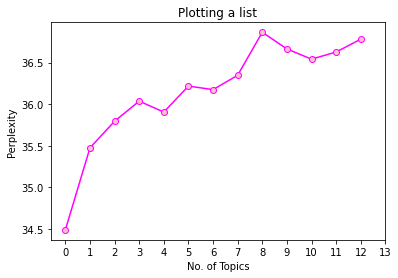

In [19]:
plt.plot(popular_perp, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(popular_perp)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Perplexity') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


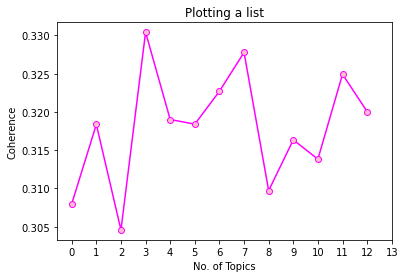

In [20]:
plt.plot(popular_coh, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(popular_coh)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Coherence') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

# Topic Modelling for Popular App + Neutral Reviews

In [21]:
popular_neutral = popular[popular['sentiment_text'] == 'Neutral'].copy()
popular_neutral.shape

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(11660, 10)

In [22]:
# Popular
# Create dictionary
popular_dictionary = gensim.corpora.Dictionary(popular_neutral['processed_further']) #map each word to a integer ID

# print('Sample word to id mappings:\n', list(popular_dictionary.items())[:50])
# print('Total Vocabulary Size:', len(popular_dictionary))

popular_dictionary.filter_extremes(no_below=20, no_above=0.5)
# print('Total Vocabulary Size:', len(popular_dictionary))

# Bag of words
popular_corpus_vect = [popular_dictionary.doc2bow(text) for text in popular_neutral['processed_further']]
# print(popular_corpus_vect[:10])

# Topic modelling
popular_topic_modelling = []
popular_perp = []
popular_coh = []

for i in range(3, 16):
    print('No. of topics:', i)
    ldamodel = gensim.models.ldamodel.LdaModel(popular_corpus_vect, num_topics = i, id2word=popular_dictionary, passes=25, random_state= 0)
    popular_topic_modelling.append(ldamodel)
    
    # Show results
    for num, topic in ldamodel.show_topics(formatted=True, num_topics=i, num_words=10):
        print(str(num)+": "+ topic)
        
    #  Perplexity
    log_perplexity = ldamodel.log_perplexity(popular_corpus_vect)
    perplexity = 2**(-log_perplexity)
    popular_perp.append(perplexity)
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=popular_neutral['processed_further'], dictionary=popular_dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    popular_coh.append(coherence_lda)
    
    print()

# print(popular_topic_modelling)
# print(popular_perp)
# print(popular_coh)

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. of topics: 3
0: 0.077*"game" + 0.023*"like" + 0.019*"get" + 0.016*"level" + 0.014*"fun" + 0.014*"love" + 0.012*"make" + 0.012*"good" + 0.011*"play" + 0.011*"time"
1: 0.014*"app" + 0.013*"phone" + 0.012*"update" + 0.012*"work" + 0.009*"cant" + 0.008*"like" + 0.008*"even" + 0.007*"back" + 0.007*"time" + 0.007*"google"
2: 0.045*"ad" + 0.031*"game" + 0.021*"time" + 0.015*"get" + 0.015*"play" + 0.013*"fix" + 0.012*"many" + 0.010*"every" + 0.010*"problem" + 0.010*"video"

No. of topics: 4
0: 0.100*"game" + 0.026*"like" + 0.018*"love" + 0.016*"play" + 0.015*"get" + 0.015*"fun" + 0.015*"good" + 0.014*"really" + 0.013*"make" + 0.013*"time"
1: 0.024*"update" + 0.019*"phone" + 0.016*"time" + 0.015*"please" + 0.014*"work" + 0.013*"back" + 0.013*"fix" + 0.012*"cant" + 0.011*"problem" + 0.010*"new"
2: 0.049*"ad" + 0.041*"game" + 0.031*"level" + 0.025*"get" + 0.017*"time" + 0.016*"play" + 0.015*"money" + 0.014*"many" + 0.010*"star" + 0.009*"every"
3: 0.015*"app" + 0.014*"like" + 0.012*"version" +


No. of topics: 12
0: 0.038*"update" + 0.034*"please" + 0.033*"problem" + 0.031*"fix" + 0.019*"year" + 0.018*"news" + 0.018*"new" + 0.017*"since" + 0.017*"last" + 0.017*"app"
1: 0.028*"account" + 0.025*"get" + 0.020*"never" + 0.019*"back" + 0.018*"got" + 0.016*"day" + 0.015*"tell" + 0.015*"money" + 0.014*"hotel" + 0.014*"even"
2: 0.061*"video" + 0.026*"watch" + 0.026*"show" + 0.026*"not" + 0.026*"can" + 0.017*"constantly" + 0.015*"flight" + 0.014*"screen" + 0.013*"bottom" + 0.013*"many"
3: 0.021*"need" + 0.015*"like" + 0.015*"app" + 0.013*"htc" + 0.013*"option" + 0.012*"note" + 0.011*"google" + 0.011*"feature" + 0.011*"device" + 0.011*"also"
4: 0.048*"like" + 0.034*"give" + 0.029*"would" + 0.027*"star" + 0.025*"pay" + 0.022*"make" + 0.019*"thing" + 0.017*"get" + 0.016*"really" + 0.015*"u"
5: 0.032*"add" + 0.024*"card" + 0.021*"time" + 0.019*"update" + 0.016*"player" + 0.013*"gem" + 0.012*"please" + 0.011*"guy" + 0.011*"get" + 0.010*"new"
6: 0.035*"photo" + 0.025*"want" + 0.022*"picture

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


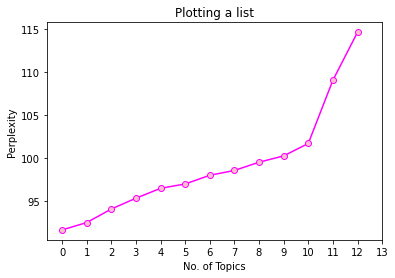

In [23]:
plt.plot(popular_perp, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(popular_perp)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Perplexity') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


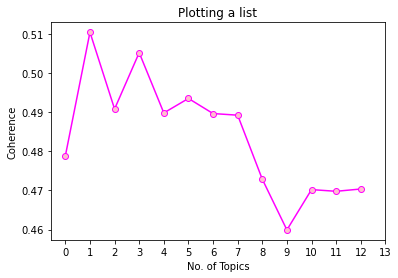

In [24]:
plt.plot(popular_coh, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(popular_coh)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Coherence') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph